# The $Q^2$ reconstruction

In [9]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
%matplotlib inline

In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Q2/'

In [3]:
versions['data date'] = '2018_05_11'
versions['overlay date'] = '2018_05_11'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'

In [4]:
OnBeam = pd.concat([pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['OnBeam']+'_04_'+versions['data date']+'_vertices.csv')
                    ,pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['OnBeam']+'_05_'+versions['data date']+'_vertices.csv')])
OnBeamFV = sample_in_FV(OnBeam)
print "%d"%len(OnBeam)+' pairs from On-Beam, %d'%len(OnBeamFV)+' in Fiducial Volume'; print_line()

OverlayPairsFV, OverlaySamples = load_MCbnbDATAcosmicSamples(date=versions['overlay date'],filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices')

38163 pairs from On-Beam, 24323 in Fiducial Volume
--------------------------------------------------------------
283762 pairs from MC-BNB + cosmic DATA overlay
186485 pairs in FV
49707 are 1mu-1p, 26.7%
41519 are other pairs, 22.3%
95259 are cosmic, 51.1%
--------------------------------------------------------------
23996 are CC 1p 0pi, 12.9%


## re-scaling of the cosmic in the overlay, and application of the cuts

In [6]:
cuts_order  = ['no cut'
               ,'Chi2Proton'               
               ,'MatchedFlash'               
               ,'length'
               ,'non-collinearity'               
               ,'vertex activity'               
               ,'delta phi'               
               ,'Pt & delta phi'
              ]
cutlabels = ['preselection'
             ,'$dE/dx$ profile'
             ,'optical filter'
             ,'track lengths'
             ,'collinearity'
             ,'vertex activity'
             ,'coplanarity'
             ,r'$p_t$ imbalance'
            ]
overlay_scalings = dict()
f_Cosmic=0.909
overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic] = get_samples_scaling( N_total= float(len(OnBeamFV)), f_Cosmic=f_Cosmic, OverlaySubsamples=OverlaySamples)
print 'overlay scalings';pp.pprint(overlay_scalings)
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples, cuts_order=cuts_order
                                                                   ,overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic])
print 'applied cuts to overlay'
reducedOnBeam,BeamOnNumbers = apply_cuts_to_data(OnBeamFV=OnBeamFV,cuts_order=cuts_order)
print 'applied cuts to data'

overlay scalings
{   'N(On) scaling and f(cosmic)=0.91': {   '1mu-1p': 0.024262743077631366,
                                            'CC 1p 0pi': 0.024262743077631366,
                                            'N(Ovelay)/N(On)': 7.667022982362373,
                                            'cosmic': 0.23209992756589928,
                                            'other pairs': 0.024262743077631366}}
applied cuts to overlay
applied cuts to data


## The $Q^2$ momentum reconstruction

In [7]:
selected_events = reducedOnBeam['Pt & delta phi']
print len(selected_events),'selected pairs in data'
selected_overlay=dict()
for pair_type in pair_types:
    selected_overlay[pair_type] = reducedOverlay['Pt & delta phi'][pair_type]
selected_CC1p0pi = selected_overlay['CC 1p 0pi']
print len(selected_CC1p0pi),'selected CC1p0π pairs in overlay'

350 selected pairs in data
7304 selected CC1p0π pairs in overlay


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Q2/Q2_gen_vs_rec_CCIpOpi.pdf


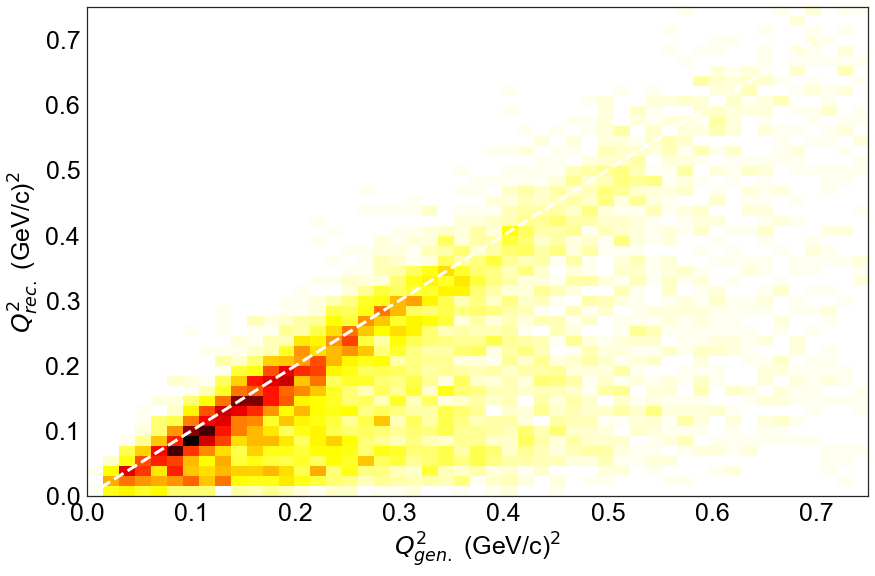

In [15]:
fig,ax=plt.subplots(figsize=(14,9))
plot_2d_hist(selected_CC1p0pi['truth_Q2'],selected_CC1p0pi['reco_Q2']
             ,bins=linspace(0.,0.75,50),ax=ax);
ax.plot([0.,0.75],[0.,0.75],'--',color='white',alpha=1,linewidth=3)
set_axes(ax,r'$Q^2_{gen.}$ (GeV/c)$^2$',r'$Q^2_{rec.}$ (GeV/c)$^2$',do_add_legend=True)
save_figure(figures_path+'Q2_gen_vs_rec_CCIpOpi.pdf')

mean,sigma: 0.094574664162 0.128882689629
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Q2/Q2_gen_rec_CCIpOpi.pdf


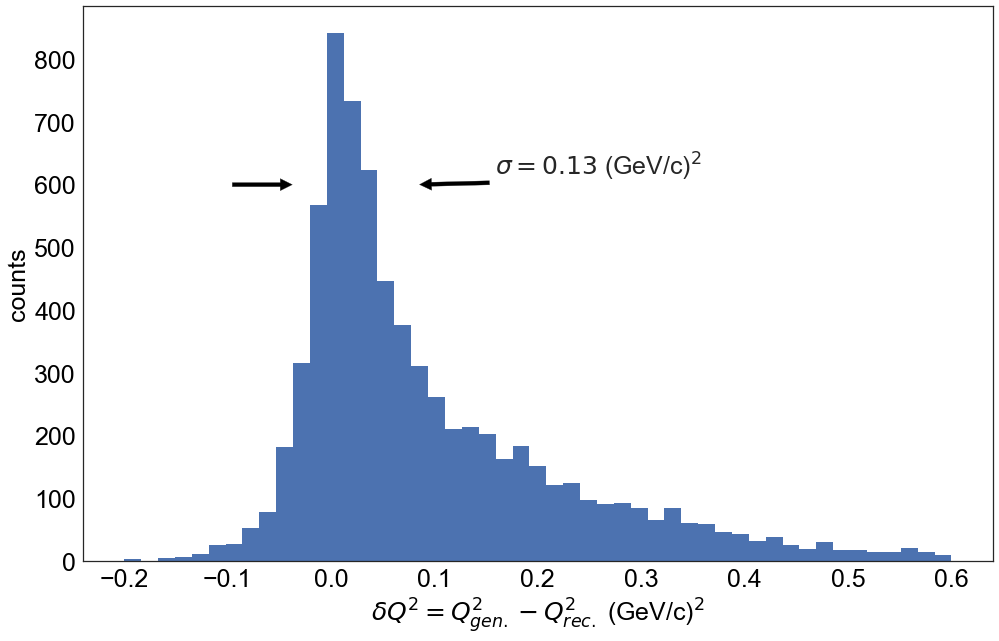

In [98]:
fig,ax=plt.subplots(figsize=(14,9))
delta = selected_CC1p0pi['truth_Q2'] - selected_CC1p0pi['reco_Q2']
truncated = selected_CC1p0pi[np.abs(delta)<0.6]
delta_truncated = truncated['truth_Q2'] - truncated['reco_Q2']
mean,sigma = np.mean(delta_truncated),np.std(delta_truncated)
print 'mean,sigma:',mean,sigma
plt.hist(delta,bins=linspace(-0.2,0.6,50))
ax.annotate('',xy=(mean-sigma,600),xytext=(mean-1.5*sigma,600),fontsize=25
            ,arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate(r'$\sigma=%.2f$ (GeV/c)$^2$'%(sigma),xy=(mean-0.1*sigma,600),xytext=(mean+0.5*sigma,615),fontsize=25
            ,arrowprops=dict(facecolor='black', shrink=0.05))
set_axes(ax,r'$\delta Q^2 = Q^2_{gen.}-Q^2_{rec.}$ (GeV/c)$^2$','counts')
plt.tight_layout()
save_figure(figures_path+'Q2_gen_rec_CCIpOpi.pdf')

mean,sigma: 29.2945830265 34.4516428394
mean-sigma: -5.15705981298 mean-1.5*sigma: -22.3828812327
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Q2/Q2_gen_rec_gen_CCIpOpi.pdf


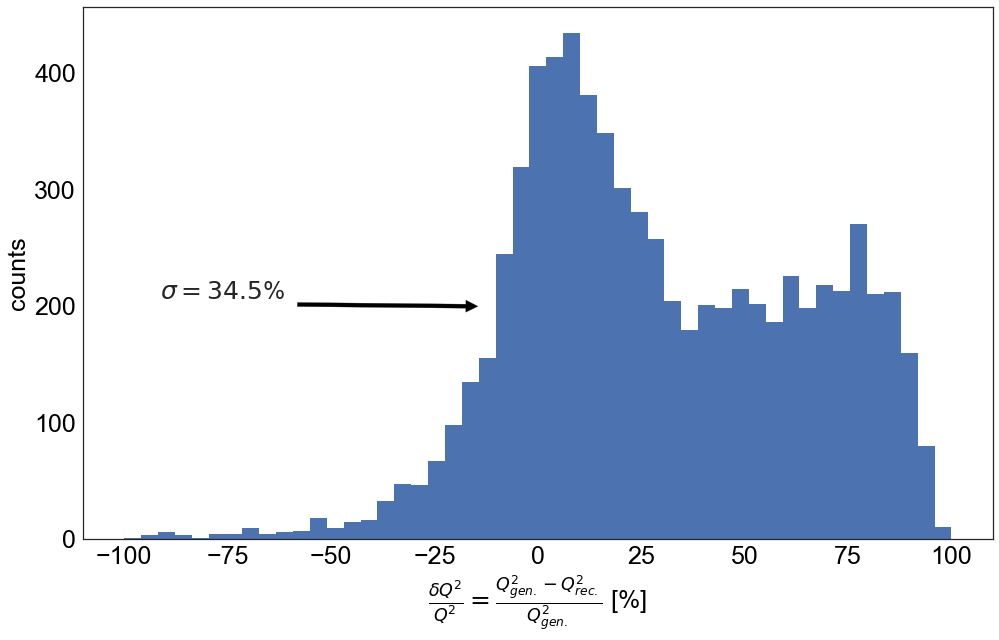

In [99]:
fig,ax=plt.subplots(figsize=(14,9))
R = 100*(selected_CC1p0pi['truth_Q2'] - selected_CC1p0pi['reco_Q2'])/selected_CC1p0pi['truth_Q2']
truncated = selected_CC1p0pi[np.abs(R)<100]
R_truncated = 100*(truncated['truth_Q2'] - truncated['reco_Q2'])/truncated['truth_Q2']
mean,sigma = np.mean(R_truncated),np.std(R_truncated)
print 'mean,sigma:',mean,sigma
plt.hist(R,bins=linspace(-100,100,50))
print 'mean-sigma:',(mean-sigma),'mean-1.5*sigma:',(mean-1.5*sigma)
ax.annotate((r'$\sigma=%.1f$'%(sigma)+'%'),xy=(mean-1.2*sigma,200),xytext=(mean-3.5*sigma,206),fontsize=25
            ,arrowprops=dict(facecolor='black', shrink=0.05))
set_axes(ax,r'$\frac{\delta Q^2}{Q^2} = \frac{Q^2_{gen.}-Q^2_{rec.}}{Q^2_{gen.}}$ [%]','counts')
plt.tight_layout()
save_figure(figures_path+'Q2_gen_rec_gen_CCIpOpi.pdf')

## The main reason for this impairment in the $Q^2$ reconstruction is the breakage of the muon tracks

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Q2/Pmu_gen_vs_rec_CCIpOpi.pdf


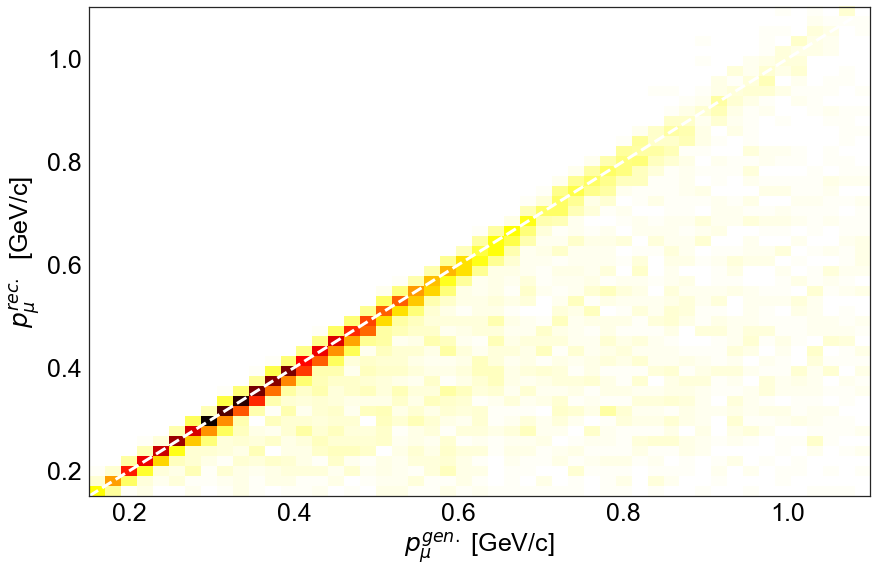

In [88]:
fig,ax=plt.subplots(figsize=(14,9))
plot_2d_hist(selected_CC1p0pi['truth_Pmu'],selected_CC1p0pi['reco_Pmu']
             ,bins=linspace(0.15,1.1,50),ax=ax);
ax.plot([0.15,1.1],[0.15,1.1],'--',color='white',alpha=1,linewidth=3)
set_axes(ax,r'$p_{\mu}^{gen.}$ [GeV/c]',r'$p_{\mu}^{rec.}$  [GeV/c]',do_add_legend=True)
save_figure(figures_path+'Pmu_gen_vs_rec_CCIpOpi.pdf')

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Q2/l_muCandidate_gen_vs_rec_CCIpOpi.pdf


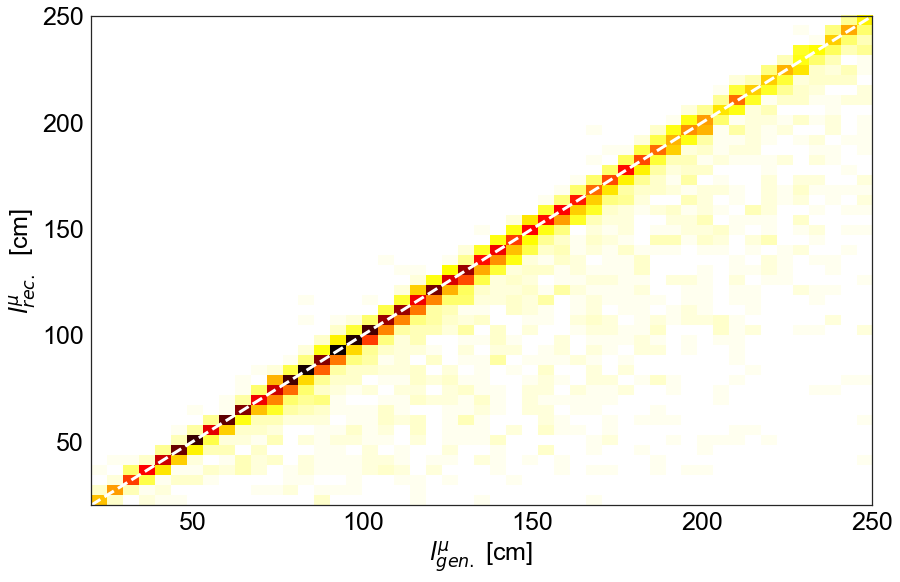

In [91]:
fig,ax=plt.subplots(figsize=(14,9))
plot_2d_hist(selected_CC1p0pi['truth_l_muCandidate'],selected_CC1p0pi['l_muCandidate']
             ,bins=linspace(20,250,50),ax=ax);
ax.plot([20,250],[20,250],'--',color='white',alpha=1,linewidth=3)
set_axes(ax,r'$l^{\mu}_{gen.}$ [cm]',r'$l^{\mu}_{rec.}$  [cm]',do_add_legend=True)
save_figure(figures_path+'l_muCandidate_gen_vs_rec_CCIpOpi.pdf')

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Q2/Pmu_theta_gen_vs_rec_CCIpOpi.pdf


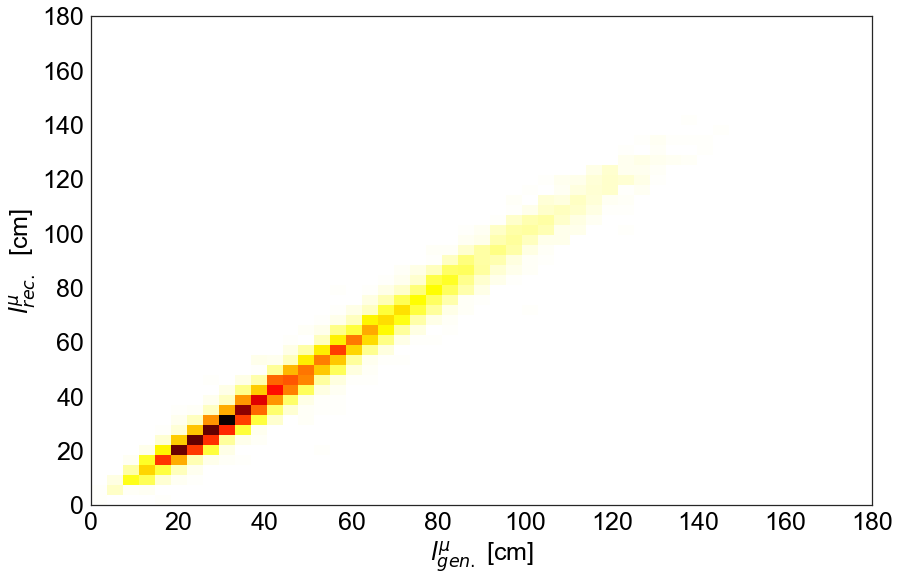

In [83]:
fig,ax=plt.subplots(figsize=(14,9))
plot_2d_hist(180./np.pi*selected_CC1p0pi['truth_Pmu_theta'],180./np.pi*selected_CC1p0pi['reco_Pmu_theta']
             ,bins=linspace(0,180,50),ax=ax);
set_axes(ax,r'$l^{\mu}_{gen.}$ [cm]',r'$l^{\mu}_{rec.}$  [cm]',do_add_legend=True)
save_figure(figures_path+'Pmu_theta_gen_vs_rec_CCIpOpi.pdf')

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Q2/Pp_theta_gen_vs_rec_CCIpOpi.pdf


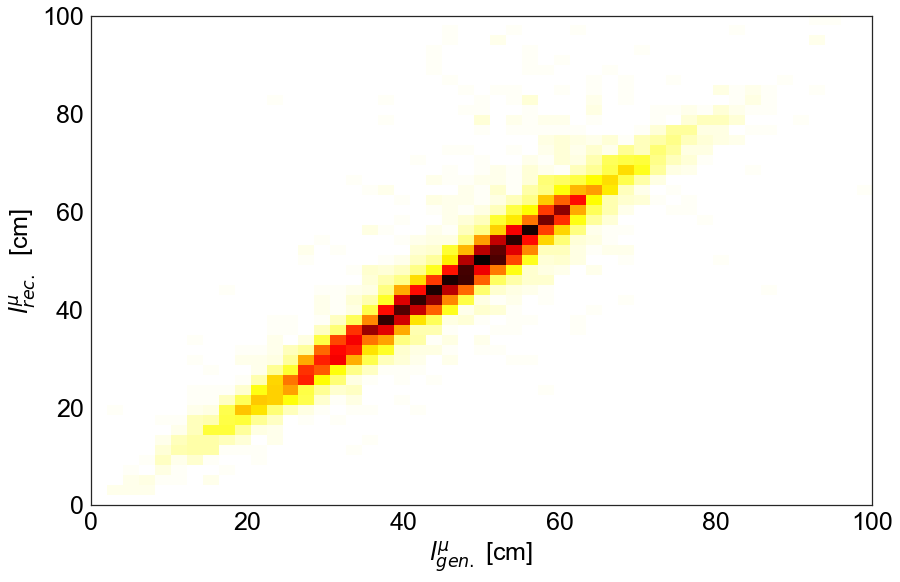

In [85]:
fig,ax=plt.subplots(figsize=(14,9))
plot_2d_hist(180./np.pi*selected_CC1p0pi['truth_Pp_theta'],180./np.pi*selected_CC1p0pi['reco_Pp_theta']
             ,bins=linspace(0,100,50),ax=ax);
set_axes(ax,r'$l^{\mu}_{gen.}$ [cm]',r'$l^{\mu}_{rec.}$  [cm]',do_add_legend=True)
save_figure(figures_path+'Pp_theta_gen_vs_rec_CCIpOpi.pdf')